In [3]:
import glob

import began
from began.visualization import plot, mplot

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import healpy as hp

import h5py
import PIL
import imageio

%matplotlib inline

In [4]:
anim_file = 'reports/figures/trained_vae_t.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('reports/figures/image*.png')
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [5]:
with h5py.File("/home/bthorne/projects/gan/began/data/preprocessed/prepared.h5", "r") as f:
    dset = f["norm_maps"]
    train_subset = dset[:3, ...]

In [6]:
lat_dim = 128
kernel_size = 6 
model = began.CVAE(lat_dim, kernel_size)
model.load_weights('/home/bthorne/projects/gan/began/models/vae.h5')

In [7]:
recovered = model.decode(model.encode(train_subset))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



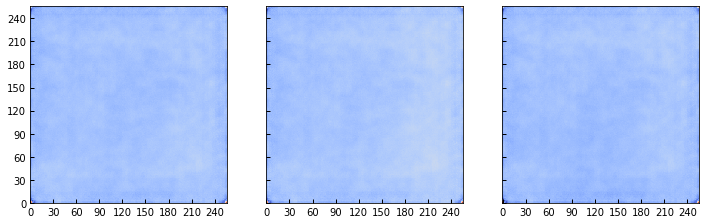

In [8]:
mplot(recovered[..., 0]);

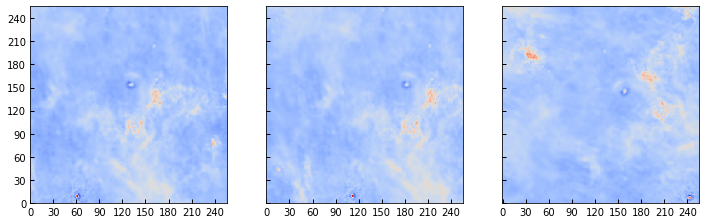

In [9]:
mplot(train_subset[:3, ..., 0]);

In [10]:
mean, var = model.encode(train_subset[:10])

(array([  9.,  15.,  15.,  51., 223.,  50.,  10.,   5.,   0.,   6.]),
 array([-2.1442502 , -1.6729462 , -1.2016423 , -0.7303384 , -0.25903448,
         0.21226943,  0.68357337,  1.1548773 ,  1.6261811 ,  2.097485  ,
         2.568789  ], dtype=float32),
 <a list of 10 Patch objects>)

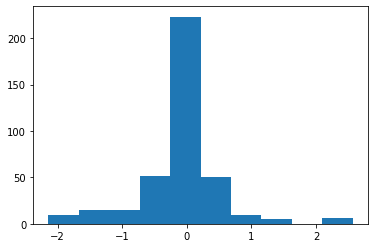

In [11]:
plt.hist(mean.numpy().flatten())

(array([  3.,   6.,   9.,   9.,  18.,  18.,  18.,  21.,  80., 202.]),
 array([-3.7811542 , -3.3724358 , -2.9637172 , -2.5549989 , -2.1462803 ,
        -1.7375618 , -1.3288434 , -0.92012495, -0.5114065 , -0.10268804,
         0.30603042], dtype=float32),
 <a list of 10 Patch objects>)

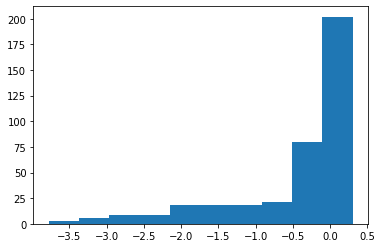

In [12]:
plt.hist(var.numpy().flatten())

In [13]:
generated = model.decode(np.random.randn(9, 128))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



(array([4.98000e+03, 1.52802e+05, 2.80573e+05, 1.42039e+05, 8.99800e+03,
        2.88000e+02, 7.40000e+01, 4.20000e+01, 2.30000e+01, 5.00000e+00]),
 array([-0.7898728 , -0.7510791 , -0.7122853 , -0.67349154, -0.63469774,
        -0.595904  , -0.5571102 , -0.51831645, -0.47952268, -0.4407289 ,
        -0.40193513], dtype=float32),
 <a list of 10 Patch objects>)

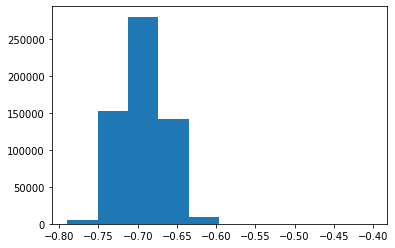

In [14]:
plt.hist(generated.numpy().flatten())

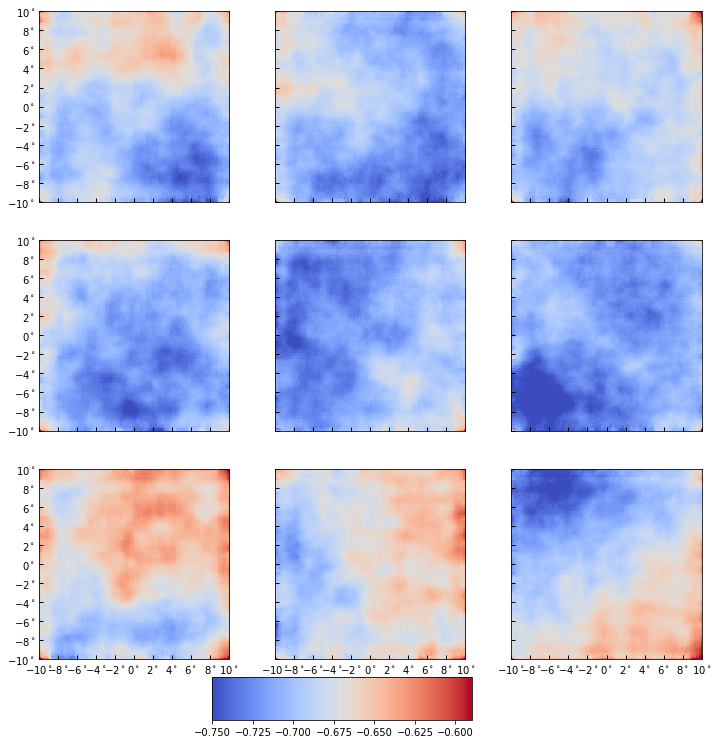

In [22]:
fig, axes = mplot(generated[..., 0], cbar_range=[-0.75, -0.59], extent=(-10, 10, -10, 10))
fig.savefig("reports/figures/latent-sample.png", bbox_inches='tight')

(array([1.60000e+01, 1.31000e+02, 3.43500e+04, 1.36905e+05, 2.24620e+04,
        2.34600e+03, 3.11000e+02, 6.90000e+01, 1.00000e+01, 8.00000e+00]),
 array([-0.99996992, -0.96408497, -0.92820002, -0.89231507, -0.85643013,
        -0.82054518, -0.78466023, -0.74877529, -0.71289034, -0.67700539,
        -0.64112044]),
 <a list of 10 Patch objects>)

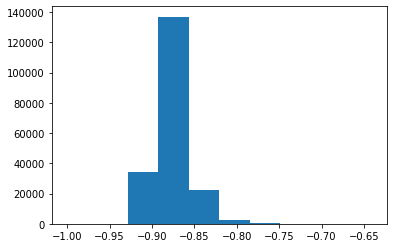

In [45]:
plt.hist(train_subset.flatten())